# Analisi dei tweet del presidente Trump dal 2009-05-04 al 2020-01-20
## Cosa vogliamo fare?
- Andamento di like e retweet
- Occorrenza di parole
- ~~Conteggio di mistyping~~

## Versione dei csv:

**Word-occurances-Trump-tweets:**
- *0*: ci sono le occorrenze singolari e altre, parole inutili 
- *1*: rimozione delle singolarità
- *2*: aggiunta del tipo di parola e rimozione di altre parole (congiunnzione, avverbi, ...)


![donnie](other/donnie.jpg)



## Operazioni generali

In [1]:
import re 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# nltk.download('averaged_perceptron_tagger')

df = pd.read_csv("datas/Trump-tweets.csv")

df = df.iloc[:, 2:6] # prendo solo le colonne che mi interessano
df.tail()

,content,date,retweets,favorites
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944
41120,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921
41121,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902


***
***

## Occorrenza di parole 
<br>
Per prima cosa ho estratto tutti i contenuti dei tweet dal database, poi ne ho creato una lista, che ho salvato su un file testo. Per ogni riga del file vi era un parola con il relativo numero di volte che era stata trovata nei tweet nel formato: *parola num_occorrenze*, ho eliminato tutte le parole con occorrenza=1, poichè per la maggior parte erano mistyping, url o altre fonti di rumore dei dati.


### Operazioni generali

In [2]:
occ = pd.read_csv("datas/Word-occurances-Trump-tweets(1).csv")

### Word_list
Utilizziamo questa classe per creare una lista di numbered_word con alcuni metodi utili
#### Parametri:

- **list:** list di nubered_word 
      la lista dove metteremo tutte le parole con le relative occorrenze
      
#### Metodi:

- **add_word(new_word):** void
      aggiunge la parola se non è già presente nella lista, altrimenti ne incrementa di uno l'occorrenza


In [3]:
class numbered_word(object): # definisco una classe, la utilizzo come sturct per memorizzare word e relative occorrenze
    def __init__(self, word):
        self.word = word
        self.occured = 1
    def occurance(self):
        self.occured += 1
        
        
class word_list(object): # definisco una classe lista per la conta delle occorrenze
    def __init__(self):
        self.list = []
    
    
    def add_word(self, new_word): # se la parola esiste già nella list aumento le volte che è occorsa altrimenti la aggiugno
        for item in self.list:
            if new_word == item.word:
                item.occurance()
                return
        self.list.append(numbered_word(new_word))
    
    
    def display(self): # stampa della lista
        for item in self.list:
            print(item.word + " " + str(item.occured))
        


In [4]:
# commentato perchè pesante computazionalmente, i dati estratti sono stati importati dopo da un file ottenuto
# dal primo run di queste righe, comunque conta quante volte ogni parola è stata scritta
"""
list = word_list()
for content in df.iloc[:, 0]:
    content = content.split()
    for word in content:
        # str.maketrans crea una tavola di traduzione che è l'oggetto che richiede .translate, poi translate elimina  
        # la punteggiatura, lo fa sostituendo il primo carattere al secondo e poi niente al terzo array 
        list.add_word(word.translate(str.maketrans('', '', string.punctuation + '“' + '”' + '…')).lower())
list.display()
"""

"\nlist = word_list()\nfor content in df.iloc[:, 0]:\n    content = content.split()\n    for word in content:\n        # str.maketrans crea una tavola di traduzione che è l'oggetto che richiede .translate, poi translate elimina  \n        # la punteggiatura, lo fa sostituendo il primo carattere al secondo e poi niente al terzo array \n        list.add_word(word.translate(str.maketrans('', '', string.punctuation + '“' + '”' + '…')).lower())\nlist.display()\n"

In [5]:
# creo due liste con word e occorrenze per farne un dataset sucessivamente

# 'Words in Donnie's Tweet.txt' e il text file che ho ottenuto dal copia-incolla dell'output precedente in un .txt
f = open("datas/Words-in-Donnie's-Tweet.txt", "r", encoding='utf-8') 
lines = f.readlines() 
wrds = []
occurances = []
n = 0

for l in lines:
    try:
        l = l.split(' ')
        l[1] = l[1][:-1]
        wrds.append(str(l[0]))
        occurances.append(l[1])
    except IndexError:
        print("index error alla riga: ", l)
        n += 1
    
        
        
print("Errori: ", n)
for word, occurance in zip(wrds, occurances):
    print(str(word) + " " + occurance)
    break

print("Righe del file:", len(lines))
print("Righe delle 2 liste:", len(wrds))
print("Righe scomparse:", len(lines) - len(wrds))
print("Total words:", len(wrds))
print("Total occurances:", len(occurances))

index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
index error alla riga:  ['\n']
Errori:  31
be 6493
Righe del file: 526

In [6]:
# Come si può vedere dall'output precedente il file aveva più righe dei 2 vettori, per controllare che non vi fossero 
# data leaks ho eseguito alcuni test con la libreria re, è risultato che venivano saltate(giustamente) delle righe
# contenenti '\n'
actual_n =0 
n =0
i = 0
for l in lines:
    try:
        actual_n += int(re.search(" \d{1,6}", l)[0])
    except TypeError:
        #print(l)
        i+=1
        
for occurance in occurances:
    n += int(occurance)

print("Righe saltate:", i)
print("Numero totale di parole estratto dal file", actual_n)
print("Numero totale di parole estratto dalla lista words", n)

Righe saltate: 31
Numero totale di parole estratto dal file 845524
Numero totale di parole estratto dalla lista words 845524


In [7]:
# creo un nuovo dataset con le parole e le relative occorenze
data = list(zip(wrds, occurances))
occ = pd.DataFrame(data, columns=['Word', 'Occurance']) 
# print("Numero parole:", len(pd.unique(occ.iloc[:,0])))
# print(pd.unique(occ.iloc[:,0]))

### Manipolazione del database

In questa cella eseguo tutte le manipolazioni del database ritenute necessarie
- drop dei valori NaN
- drop di tutti i valori che iniziano con una cifra (erano per lo più numeri o parole ininfluenti)
- drop di tutti i valori con occorrenza = 1 (erano url, mistyping o altre cose ininfluenti)
- ordinamento per occorrenze
- conversione della colonna occorenze in interi

In [8]:
occ['Occurance'] = occ['Occurance'].astype(int)

index_to_drop_number = occ[occ['Word'].str[0].isin(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])].index  #questa parte mi da un array degli indici che poi vengono dati a drop

occ = occ.drop(index_to_drop_number)
occ = occ.drop(occ[occ['Occurance'] == 1].index)
occ = occ.drop(occ[occ['Word'] == ""].index)

occ = occ.sort_values(by='Occurance', ascending=False)

tags = []
tagged = nltk.pos_tag(list(occ['Word']))

for tag in tagged:
    tags.append(tag[1])
occ['Type-of-word'] = tags

rdt_index = occ[occ['Word'] == 'realdonaldtrump'].index[0] # trova l'indice dove c'è 'realdonaldtrump' per cui dobbiamo fare una gestione particolare
occ.at[rdt_index, 'Type-of-word'] = 'ASD' # sostituisce il tipo di parola

to_drop_type = ['CC', 'CD', 'DT', 'EX', 'IN', 'LS', 'PDT', 'POS', 'PRP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBZ', 'VBP', 
                'PRP$', 'RB', 'WP', 'VBN', 'VBG', 'MD', 'WRB', 'RBR']
index_to_drop_type = occ[occ['Type-of-word'].isin(to_drop_type)].index

occ = occ.drop(index_to_drop_type)
occ.head()
# occ.to_csv('datas/Word-occurances-Trump-tweets(n).csv', index = False)

,Word,Occurance,Type-of-word
3255,realdonaldtrump,8578,ASD
136,great,6100,JJ
8,trump,5061,JJ
1355,president,2763,NN
1389,thank,2756,NNS


### Definizione di top che verrà usato nella produzione dei grafici e reimport del database aggiornato

In [9]:
occ = pd.read_csv('datas/Word-occurances-Trump-tweets(2).csv')
top = occ.head(25)

### Grafico a barre orizzontali delle occorrenze

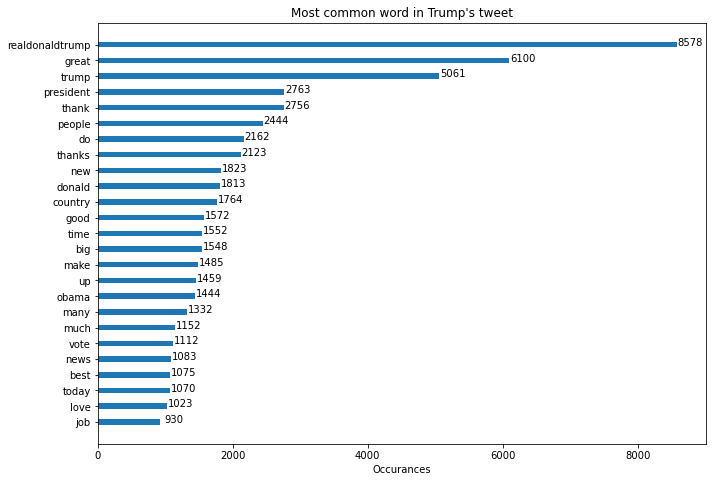

In [10]:
width = 0.35

top = top.iloc[::-1] # per girare se esce al contrario

fig, ax = plt.subplots(figsize=[10, 6.8])
# barre = ax.bar(top['Word'], top['Occurance'], width, label='Words')
barre = ax.barh(top['Word'], top['Occurance'], width, label='Words')

ax.set_xlabel('Occurances')
ax.set_title('Most common word in Trump\'s tweet')


for barra in barre:
    width = barra.get_width()
    ax.annotate('{}'.format(width), # annotazione dei numeri sopra ogni barra
                    xy=(width + 200, barra.get_y()), # posizione dell'etichetta rispetto alla mappa (+ 600 per non far sovrapporre il numero alla barra)
                    xytext=(0, 0), # posizione rispetto alla barra
                    textcoords="offset points", # definisce in che modo legge xy
                    ha='center', va='bottom') # allineamento

fig.tight_layout() # metodo che non fa uscire dal grafico etichette dgli assi e titolo
#fig.savefig('output_graphs/horizontal_bar.png')
plt.show()

### Grafico a barre verticali delle occorrenze

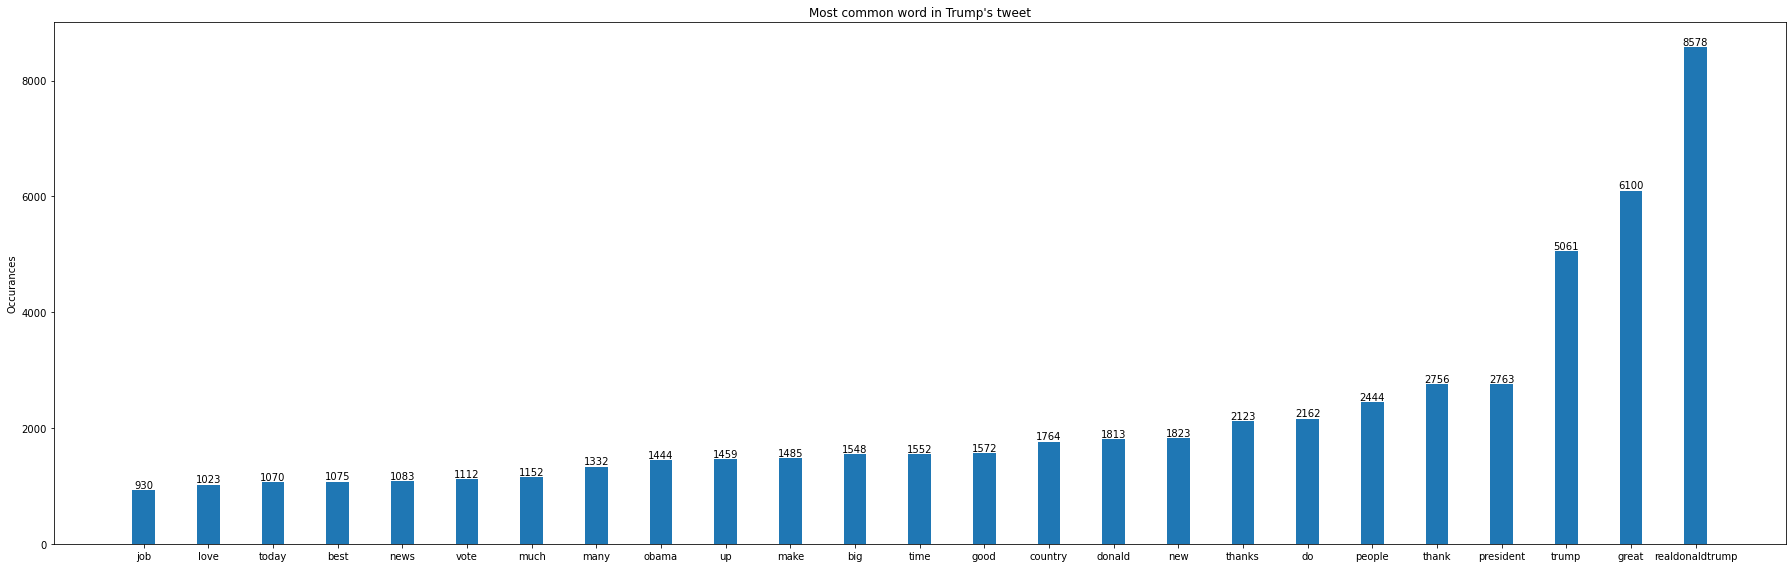

In [11]:
width = 0.35

#top = top.iloc[::-1] # per girare se esce al contrario

fig, ax = plt.subplots(figsize=[25, 8])
# barre = ax.bar(top['Word'], top['Occurance'], width, label='Words')
barre = ax.bar(top['Word'], top['Occurance'], width, label='Words')

ax.set_ylabel('Occurances')
ax.set_title('Most common word in Trump\'s tweet')


for barra in barre:
    height = barra.get_height()
    ax.annotate('{}'.format(height), # annotazione dei numeri sopra ogni barra
                    xy=(barra.get_x() + barra.get_width()/2, height), # posizione dell'etichetta rispetto alla mappa
                    
                    xytext=(0, 0), # posizione rispetto alla barra
                    textcoords="offset points", # definisce in che modo legge xy
                    ha='center', va='bottom') # allineamento
fig.tight_layout() # metodo che non fa uscire dal grafico etichette dgli assi e titolo
#fig.savefig('output_graphs/vertical_bar.png')
plt.show()

### Diagramma scatter delle occorrenze

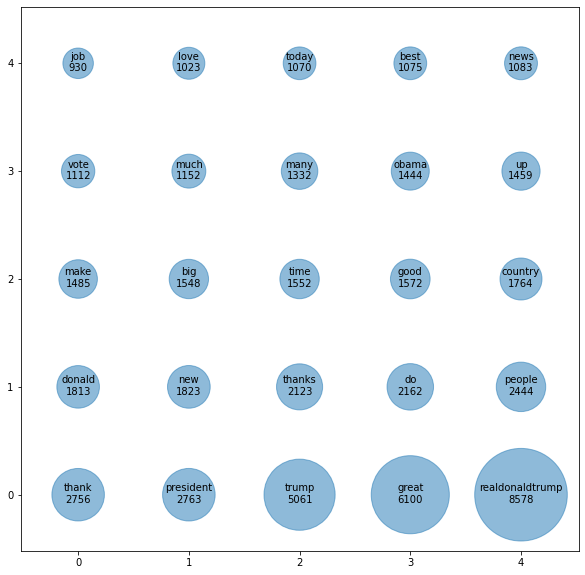

In [12]:
fig, ax = plt.subplots(figsize=[10, 10])
area = top['Occurance']
x_ax = np.arange(25)
x_ax = np.remainder(x_ax, 5)
y_ax = np.arange(0, 25)[::-1]
y_ax = y_ax//5

scat = ax.scatter(x_ax, y_ax, s=area, alpha=0.5, clip_on=False)
ax.margins(0.13)

for word, x, y, occurance in zip(top['Word'], x_ax, y_ax, top['Occurance']):
    ax.annotate(word + '\n' + str(occurance), xy=(x, y), xytext=(0, -10), textcoords='offset points', ha='center', va='bottom')

fig.canvas.draw()


#fig.savefig('output_graphs/scatter_graph.png')
plt.show()


***
***

## Andamento di like e retweet
Per prima cosa estraiamo le colonne che ci interessano: retweet, like e date. Poi comprimiamo il tutto mettendo un giorno solo per riga invece che un tweet. Plottiamo infine un andamento del tempo dei RT e likes.

### Operazioni generali

In [13]:
lrt = pd.read_csv("Datas/Time-course-Trump-tweets(1).csv")
lrt.head()

,date,number of tweets,retweets,likes
0,2009-05,21.0,2430,3813
1,2009-06,11.0,298,498
2,2009-07,5.0,84,99
3,2009-08,7.0,386,478
4,2009-09,3.0,143,174


### Manipolazione del database

Operazioni effettuatee

- taglio delle colonne non inerenti
- eliminazione dell'ora e compressione che mette un giorno per ogni riga invece che un tweet ogni riga

In [14]:
df.head()

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


In [15]:
lrt = df.iloc[:,1:] # prendo le tre colonne che mi interessano
datas = []
rt = 0
likes = 0
n = 0
prev_date = lrt.iloc[0,0][:7]# eliminazione dell'ora e del giorno

n_date_distinte = 0 # contatore delle date distinte nel dataset prima della compressione
for i in range(len(lrt['date'])):
    date = lrt.iloc[i,0][:7]
    if(date == prev_date): # se la data è la stessa della riga sopra aumento il numero di likes e retweet
        n += 1
        rt += lrt.iloc[i,1]
        likes += lrt.iloc[i,2]
    else: # altrimenti appendo i dati trovati finora ,riferiti a un giorno, e resetto i contatori per il nuovo giorno
        n_date_distinte += 1
        datas.append(
            {
            "date": prev_date,
            "number of tweets": n,
            "retweets": rt,
            "likes": likes
            }
        )
        n = 1
        rt = lrt.iloc[i,1]
        likes = lrt.iloc[i,2]
    prev_date = date
n_date_distinte += 1
datas.append( # append dell'ultima data
            {
            "date": prev_date,
            "retweets": rt,
            "likes": likes
            }
        )

print("Numero di giorni distinti prima della compressione: ", n_date_distinte)
lrt = pd.DataFrame(datas)
print("Numero di giorni distinti prima della compressione: ", len(lrt['date'])) 
lrt.head()
# lrt.to_csv("Datas/Time-course-Trump-tweets(n).csv", index=False)

Numero di giorni distinti prima della compressione:  129
Numero di giorni distinti prima della compressione:  129


,date,number of tweets,retweets,likes
0,2009-05,21.0,2430,3813
1,2009-06,11.0,298,498
2,2009-07,5.0,84,99
3,2009-08,7.0,386,478
4,2009-09,3.0,143,174


In [16]:
lrt.to_csv("Datas/Time-course-Trump-tweets(1).csv", index=False)

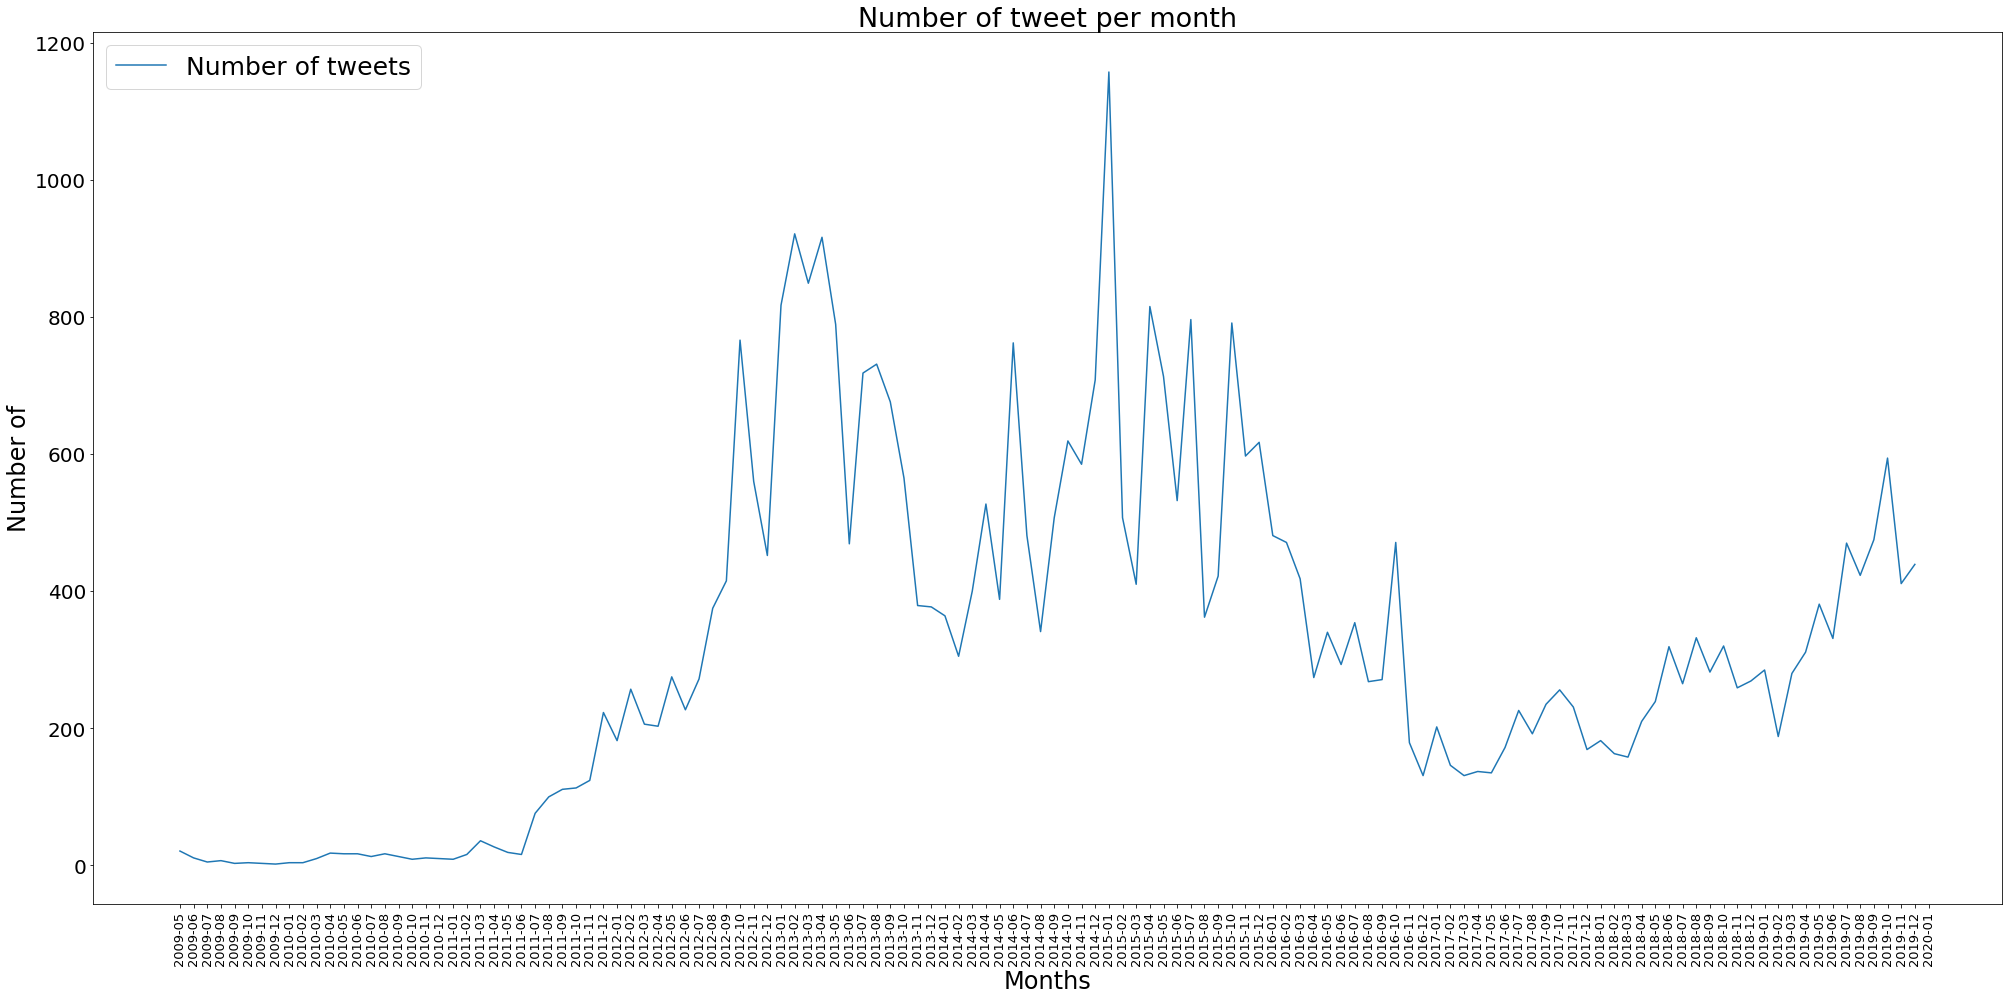

In [17]:
fig, ax = plt.subplots(figsize=[28,14])

ax.plot(lrt['date'], lrt['number of tweets'], label='Number of tweets')

ax.set_title('Number of tweet per month', fontsize=27)
plt.legend(loc='upper left', fontsize=25)
plt.xlabel('Months', fontsize=24)
plt.ylabel('Number of', fontsize=24)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=20)

fig.tight_layout()

fig.savefig('output_graphs/course-time-n-tweets.png')
plt.show()

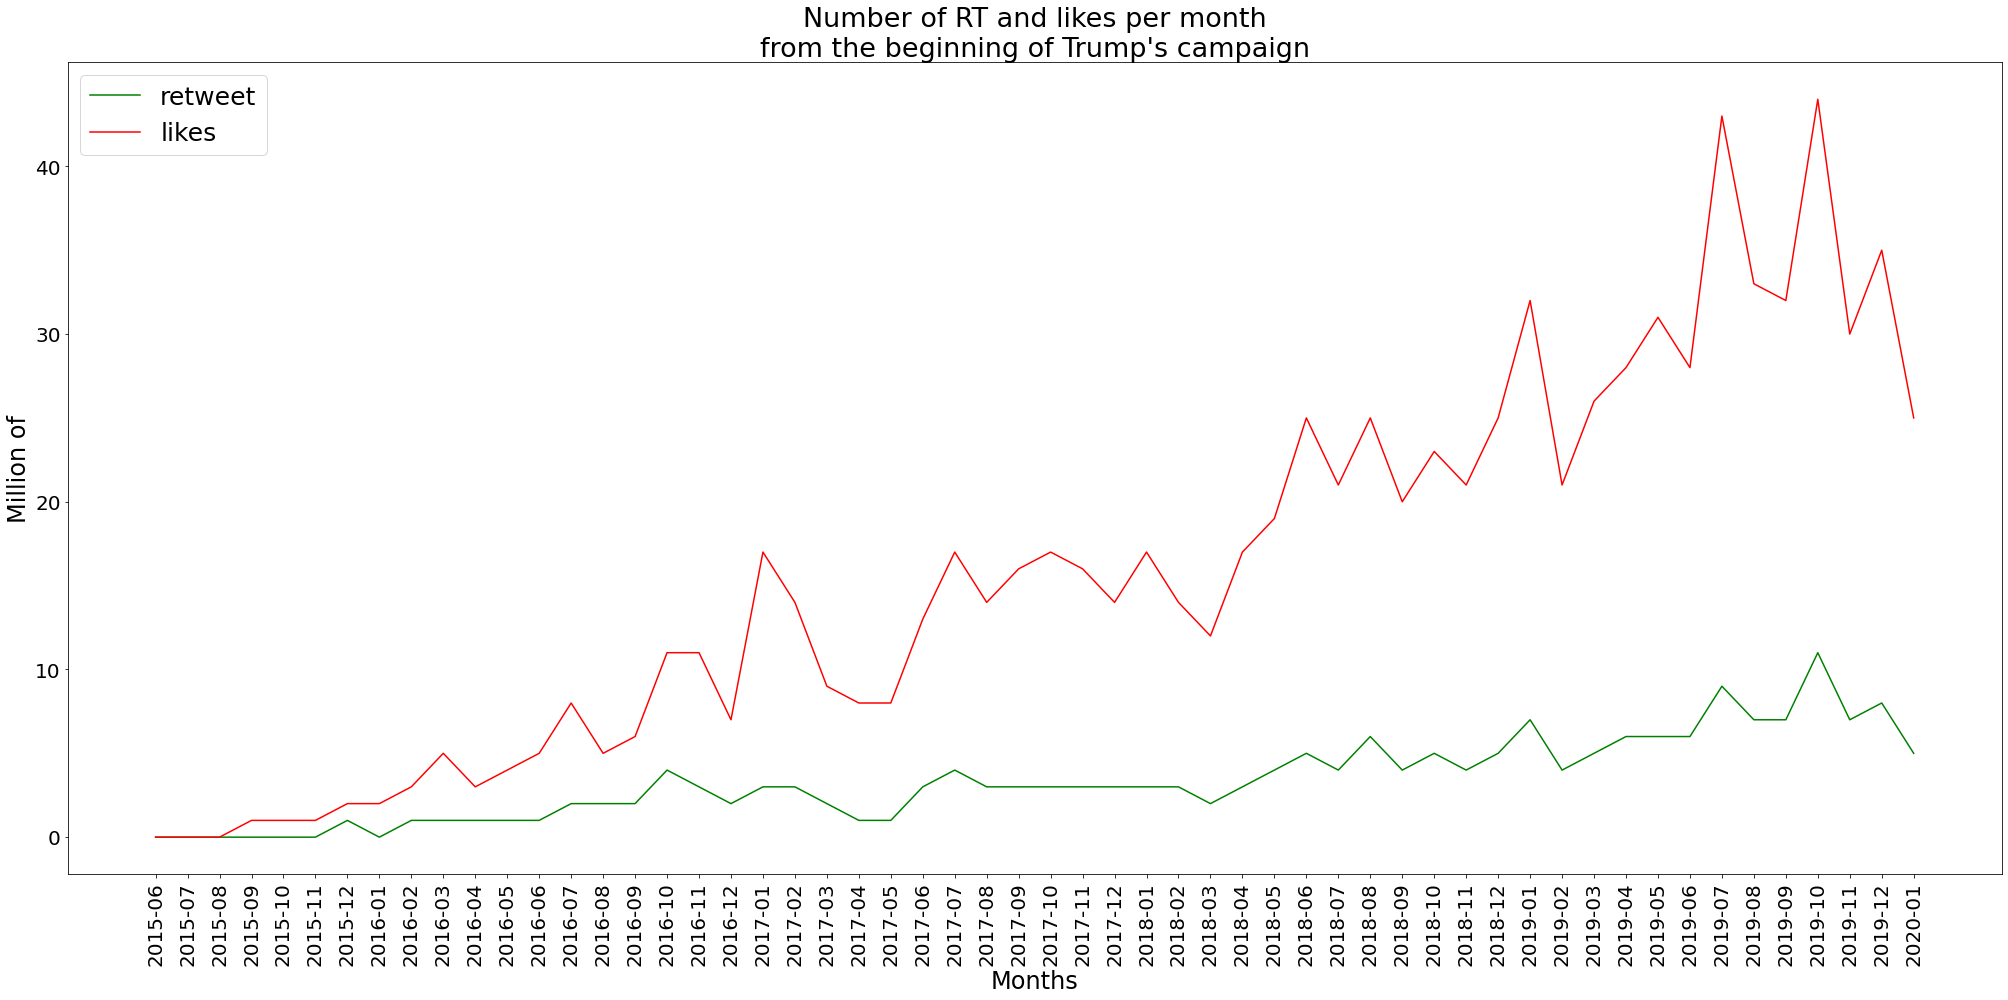

In [18]:
# per questi grafici droppo anche i valori precedenti al 16-06-2015 (data d'inizio della campagna elettorale) perchè 
# poco influenti

start_index = lrt[lrt['date'] == '2015-06'].index
start_index = start_index[0] 
compressed_lrt = lrt.iloc[start_index:]

fig, ax = plt.subplots(figsize=[28, 14])

ax.plot(compressed_lrt['date'], compressed_lrt['retweets']//1e6, color='green', label='retweet')
ax.plot(compressed_lrt['date'], compressed_lrt['likes']//1e6, color='red', label='likes')
ax.set_title('Number of RT and likes per month\nfrom the beginning of Trump\'s campaign' , fontsize=27)

plt.legend(loc='upper left', fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize= 20)
plt.xlabel('Months', fontsize=24)
plt.ylabel('Million of', fontsize=24)

fig.tight_layout()
#fig.savefig('output_graphs/course-time-n-lrt.png')

plt.show()

![who](other/who-is-the-senate.jpg)

## Documento finale
Documento finale con tutti i grafici 

![tweets-course](output_graphs/tweets-course.png)
![course-time-n-lrt](output_graphs/course-time-n-lrt.png)
![horizontal_bar-occurance](output_graphs/horizontal_bar.png)